# Drawing samples from a Gaussian with nondiagonal covariance matrix

## 0. Import Python packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 30})

# 1. Compute and plot probability density

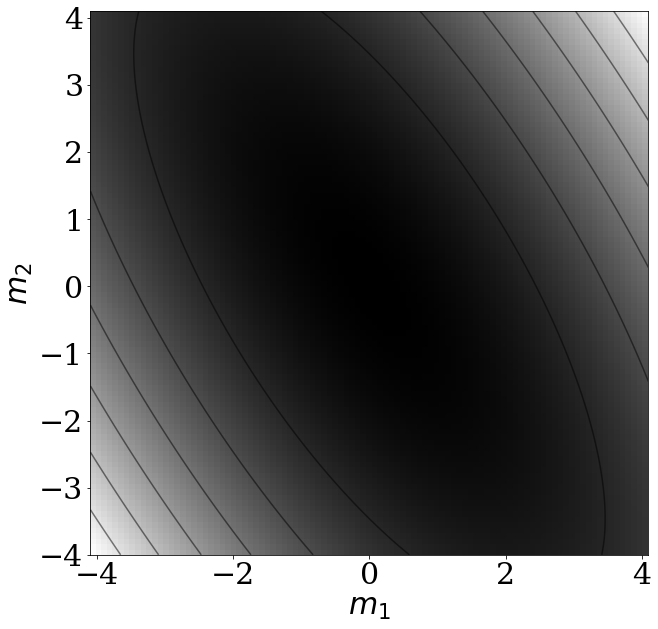

In [29]:
# Inverse covariance matrix.
Cinv=np.array([[2.0, 1.0],[1.0, 1.0]])
#Cinv=np.array([[1.0, 0.0],[0.0, 1.0]])

# Axes for plotting.
x=np.linspace(-4.1,4.1,100)
y=np.linspace(-4.0,4.1,100)
x,y=np.meshgrid(x,y)

# Compute probability density (negative log for plotting).
p=0.5*(Cinv[0][0]*x**2+Cinv[1][1]*y**2+2.0*Cinv[0][1]*x*y)

plt.subplots(figsize=(10, 10))
plt.pcolor(x,y,p,cmap='gray')
plt.contour(x,y,p,colors='k',alpha=0.5)
plt.xlabel(r'$m_1$')
plt.ylabel(r'$m_2$')
plt.show()

In [30]:
np.linalg.eig(Cinv)

(array([2.61803399, 0.38196601]),
 array([[ 0.85065081, -0.52573111],
        [ 0.52573111,  0.85065081]]))

# 2. Compute Cholesky decomposition and its inverse

In [26]:
L=np.linalg.cholesky(Cinv)
Linv=np.linalg.inv(L)

# 3. Draw samples

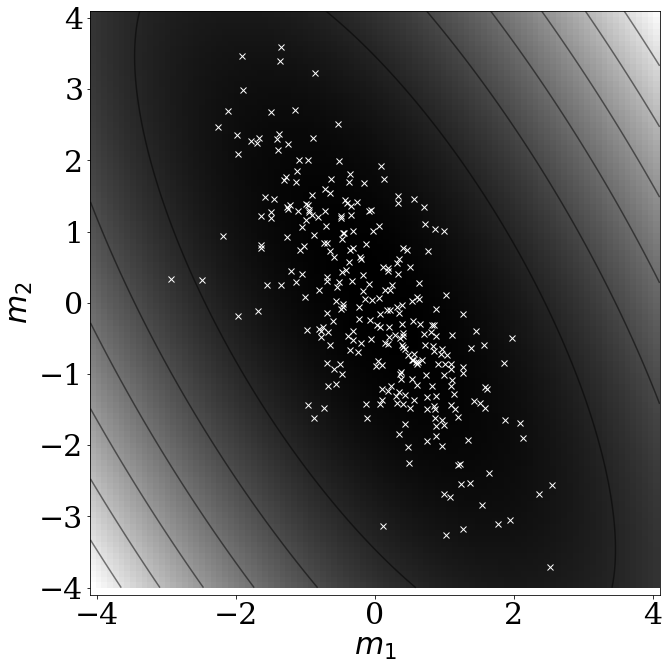

In [28]:
plt.subplots(figsize=(10, 10))
plt.pcolor(x,y,p,cmap='gray')
plt.contour(x,y,p,colors='k',alpha=0.5)
plt.xlabel(r'$m_1$')
plt.ylabel(r'$m_2$')
plt.xlim([-4.1,4.1])
plt.ylim([-4.1,4.1])
plt.tight_layout()

for k in range(1,300):
    s=np.random.randn(2)
    s=Linv.transpose().dot(s)
    plt.plot(s[0],s[1],'wx')

plt.savefig("gaussian_samples.pdf", bbox_inches='tight')
plt.show()